### Digital Filter ###

The original function before anything has been done to it:

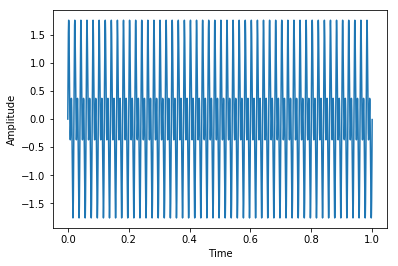

Nyquist Frequency = 29411.7647059 Hz


In [145]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 100
f2 = 50
dt = 0.000017
t = np.arange(0, 1, dt)
z = np.sin(f1*2*np.pi*t) + np.sin(f2*2*np.pi*t)
plt.plot(t, z)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

N = 1.0 / (2 * dt)
print('Nyquist Frequency = {} Hz'.format(N))

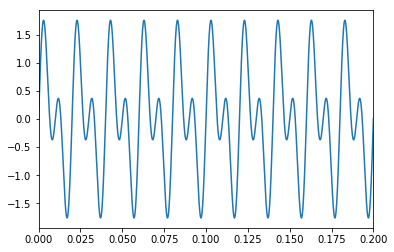

In [146]:
plt.plot(t, z)
plt.xlim([0,0.2])
plt.show()

Applying a Fourier Transform gives two peaks at frequencies 50 and 100:

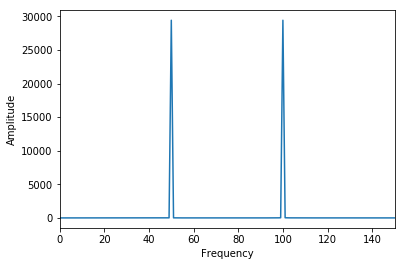

In [148]:
Z = np.fft.rfft(z) # FT of z
freq = np.fft.rfftfreq(len(z), d=0.000017)  # calculates the frequencies
plt.plot(freq, abs(Z))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim([0, 150])
plt.show()

Generates the square wave which is used as the filter:

In [162]:
y = []
for f in freq:
    if f <= 75:
        y.append(2)
    else:
        y.append(0)
        
y = np.array(y)  # this is square wave filter designed to eliminate the peak at frequency = 100 Hz

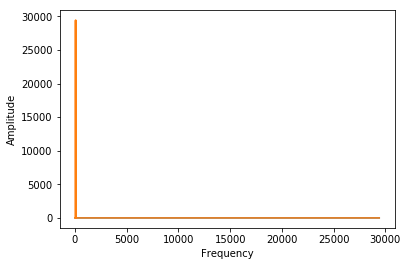

In [163]:
plt.plot(freq, y)
plt.plot(freq, abs(Z))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()  # a plot of the peaks and the square wave

Function for the filtered peaks written and plotted:

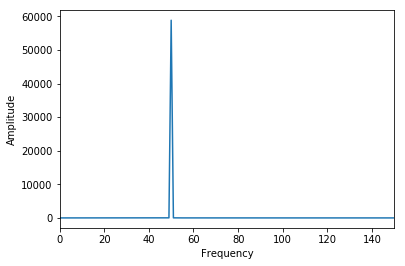

In [165]:
L = y * Z  # Filterered frequency
# plt.plot(freq, L)
plt.plot(freq, abs(L))
plt.xlabel("Frequency")
plt.ylabel('Amplitude')
plt.xlim([0, 150])
plt.show()

In [138]:
max_y = max(L)
max_x = freq[L.argmax()]

print max_x, max_y  # gives the frequency and the amplitude of the peak

49.9350843903 585.476449834


Want to do an Inverse Fourier Transform on this new function:

In [166]:
time = np.arange(0, 1, dt)  # We know the time domain from the initial 
l = np.fft.irfft(L, len(time))  # inverse FT on L

In [167]:
len(l), len(time)

(58824, 58824)

In [160]:
Z

array([-0.00199584 +0.00000000e+00j, -0.00199548 -1.41218082e-02j,
       -0.00199442 -2.82690743e-02j, ..., -0.00376994 +4.02683843e-07j,
       -0.00376994 +2.01341427e-07j, -0.00376994 +0.00000000e+00j])

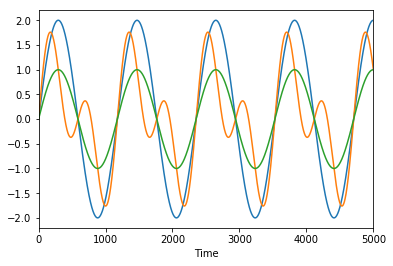

In [169]:
plt.plot(l)
plt.plot(z)
plt.plot(np.sin(f2*2*np.pi*t))
plt.xlabel("Time")
plt.xlim([0, 5000])
plt.show()

This is not exactly what is expected. Here the amplitude starts to change making a bow like shape. This also appears to be a cosine wave. The expected signal would have an amplitude of 2 as the sine waves that were given initially had an amplitude of 1 and the filter enhanced the signal at frequency 50 by doubling it meaning a sine wave of frequency 50 and amplitude 2 should be seen.

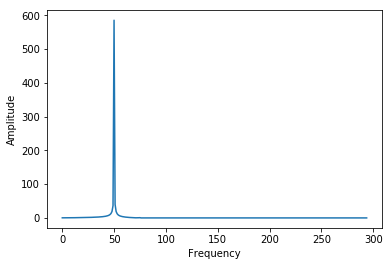

In [124]:
M = y * abs(Z)  # Filterered frequency
plt.plot(freq, M)
plt.xlabel("Frequency")
plt.ylabel('Amplitude')
plt.show()

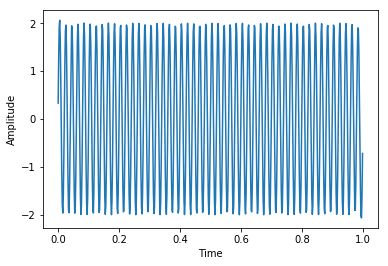

In [125]:
M = y * Z

time = np.arange(0, 1, dt)  # We know the time domain from the initial 
m = np.fft.irfft(M, len(time))  # inverse FT on L

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time, m)

This gives a closer wave to the one that's expected.

### Test on a single Sine Wave Without the Filter ###

In [16]:
%matplotlib inline

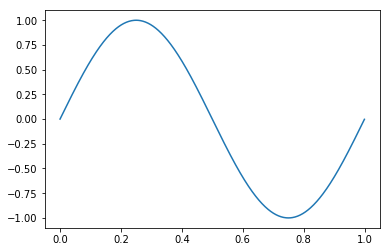

In [17]:
t = np.arange(0, 1, dt)
a = np.sin(2*np.pi*t)

plt.plot(t, a)

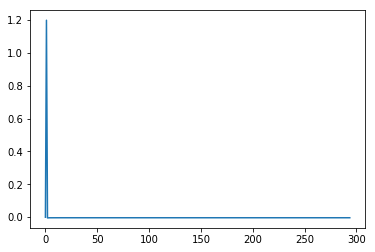

In [126]:
A = np.fft.rfft(a)
freq = np.fft.rfftfreq(len(a), d=0.0017)
plt.plot(freq, A)

In [127]:
b = np.fft.irfft(A, len(t))

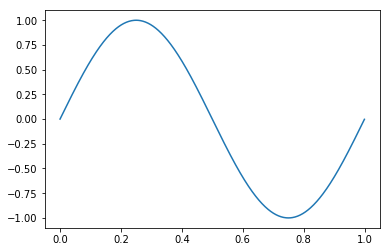

In [128]:
plt.plot(t, b)

This works as expected, this would suggest that the method being used is right.

### Another Example using a combined sin wave: ###

Nyquist Frequency = 500.0 Hz


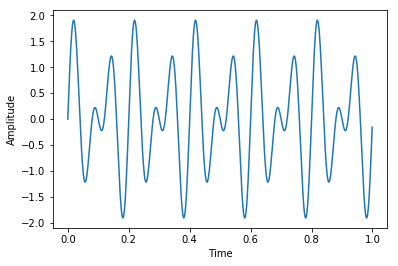

In [126]:
t = np.arange(0, 1, 0.001)
y = np.sin(10 * 2 * np.pi * t) + np.sin(15 * 2 * np.pi * t)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, y)

N = 1.0 / (2 * 0.001)
print('Nyquist Frequency = {} Hz'.format(N))

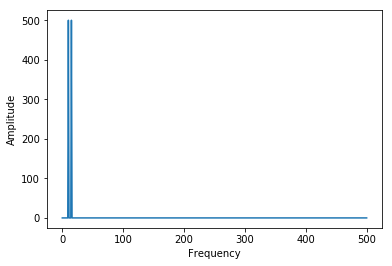

In [127]:
Y = np.fft.rfft(y)
freq = np.fft.rfftfreq(len(y), d=0.001)
# plt.xlim([0, 25])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(freq, abs(Y))

In [128]:
z = []
for f in freq:
    if f <= 13:
        z.append(1)
    else:
        z.append(0)
        
z = np.array(z)  # this is square wave filter designed to eliminate the peak at frequency = 100 Hz

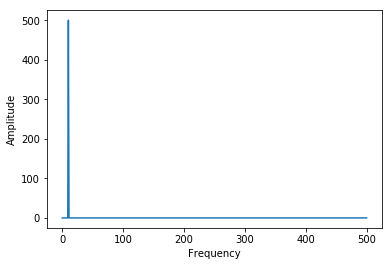

In [129]:
x = z * abs(Y)
# plt.xlim([0, 50])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(freq, x)

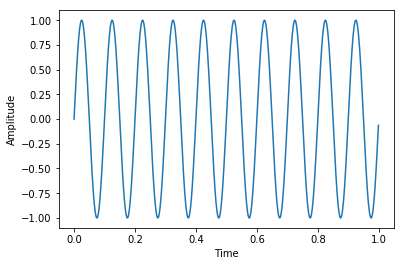

In [130]:
x = z * Y

X = np.fft.irfft(x, len(t))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, X)

It seems that to get the plot of the filtered fourier transform you need to use the absoulte (abs(Y)) value of the fourier transform but to get the  correct sine wave out at the end you need to use just the value (Y).

* Construct function (time, sine function)
* Plot function
* Apply Fourier Transform (np.fft.rfft)
* Find frequency (np.fft.rfftfreq(len(function, d=dt))
* Plot frequency against abs(Fourier Transformed data)
* Set up a square wave that acts as the filter
* Make a function that is the product of the square wave and fourier transformed data (y)
* Plotting this (using abs(Fourier Transformed data) gives the filtered spectrum
* Find Inverse Fourier Transform (np.fft.irfft(y, len(time)) not using abs(FT data)
* Plotting time against the Inverse Fourier Transformed data gives the filtered sine wave

### Filtering Using Convolution ###

Discrete Convolution:

$$\sum_{m=-\infty}^{\infty}f[m]g[n-m]$$

In [2]:
import scipy.signal as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Create Signal**

Text(0,0.5,u'Amplitude')

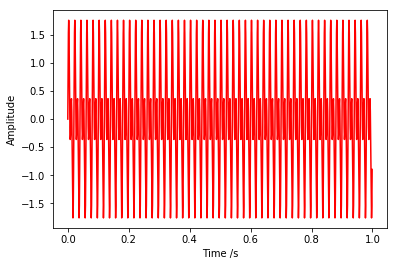

In [26]:
dt = 0.001  # time step
t = np.arange(0, 1, dt)  # time
y = np.sin(50 * 2 * np.pi * t) + np.sin(100 * 2 * np.pi * t)  # signal

# plot the signal
plt.plot(t, y, 'r')
plt.xlabel('Time /s')
plt.ylabel('Amplitude')

**Create a fuction to display the plot of Fourier Transformed signal**

In [29]:
def FT(y, dt, lim=None):
    """
        Plots the real Fourier Transform of a given function, y, and calculates the Nyquist frequency in Hz given
        the time step, dt, in seconds. x axis can be limited by the list, lim, which contains the upper and lower
        boundaries, [lower, upper], if desired.
    """
    Y = np.fft.rfft(y)
    freq = np.fft.rfftfreq(len(y), d=dt)
    plt.plot(freq, abs(Y), 'r')
    plt.xlim(lim)
    nyq = 1.0 / (2 * dt)
    print 'The Nyquist Frequency is', nyq, 'Hz'

The Nyquist Frequency is 500.0 Hz


Text(0,0.5,u'Magnitude')

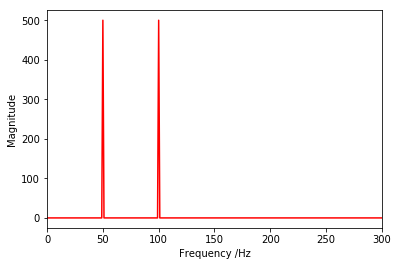

In [30]:
FT(y, dt, [0, 300])
plt.xlabel('Frequency /Hz')
plt.ylabel('Magnitude')

This shows the unfiltered frequencies of the signal at 50 Hz and 100 Hz 

**Create the FIR filter**

In [6]:
# Nyquist frequency of signal
nyq = 1.0 / (2 * dt)

# The filter and its frequency response
numtaps = 501  # can't use 1001, signal is only 1000 long and the convolution won't be calculated with larger filter
bands = (0, 0.17, 0.18, 1)  # pairs of bands 0.17 0.18
desired = (1, 1, 0, 0)  # desired response
F = sp.firls(numtaps, bands, desired)

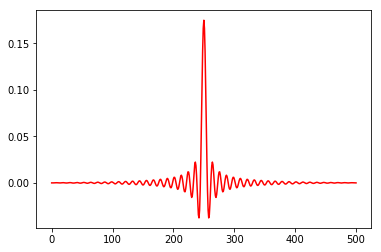

In [31]:
plt.plot(F, 'r')

Text(0,0.5,u'Relative amplitudes')

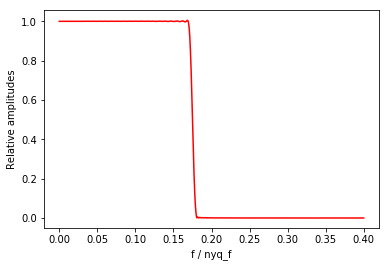

In [32]:
# Frequency Response of Filter F

f = 0.01 # starting frequency
df = 0.1 # frequency step
Num_sig = 2000 # number of signals to make up filter

amplitude = []
frequency = []

def FIR(sig, fil):
    b = sum(sig[0:len(fil)]*fil)  # first m points of signal multiplied by m filter coeffs.
    amp = abs(b / sig[(len(fil)-1)/2]) # ratio of amplitudes
    return amp

def sin(N, dt, frequency):
    time = np.arange(0,N*dt,dt)

    fr = 2*np.pi*frequency

    return np.sin(fr*time)

for n in range(Num_sig):
    a = sin(len(F), dt, f)

    amplitude.append(FIR(a, F))
    frequency.append(f / nyq)
    
    f = f + df

plt.plot(frequency, amplitude, 'r')
plt.xlabel('f / nyq_f')
plt.ylabel('Relative amplitudes')

This only works for the parameters used, changing the timestep or the bands does not produce the square that is expected

Text(0,0.5,u'Relative amplitudes')

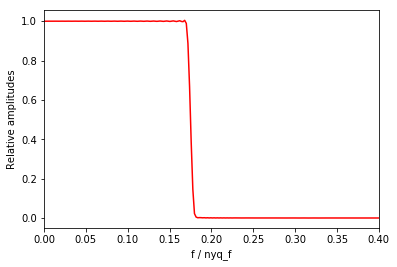

In [33]:
# Frequency Response of Filter F using Scipy
freq1, response = sp.freqz(F)
plt.plot(freq1/np.pi, np.abs(response), 'r') # added nyq here
plt.xlim([0, 0.4])
plt.xlabel('f / nyq_f')
plt.ylabel('Relative amplitudes')

**Convolve with the original signal and plot the filtered signal**

In [10]:
def Convolve(signal, coeff):
    """
        Performs the discrete convolution of signal and filter coefficients. The signal must be greater in length
        than the filter coefficients.
    """
    conv = []
    a = len(coeff)  # how many coefficients in the filter
    sig = len(signal)  # how many coefficients in the signal
    m = sig - a + 1  # difference in signal and coefficient length + 1 to get range, +1 to make sure all steps are done
    
    if a > sig:
        return 'The signal must have more coefficients than the filter'
    else:
        for i in range(m):  
            # coeffs line up with the signal and multiply, sum together, a+i moves coeff with each loop
            b = sum(np.array(signal[i:a+i]) * np.array(coeff))
            conv.append(b)
        return conv

In [11]:
# Test on a known convolution, would expect [2, 3, 4, 5] here:
a = [0, 1, 0]
b = [1, 2, 3, 4, 5, 7] 

Convolve(b, a)

[2, 3, 4, 5]

In [12]:
# Convolve the signal and filter coefficients
Fy_conv = Convolve(y, F)

Text(0,0.5,u'Amplitude')

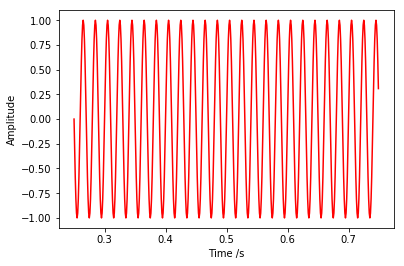

In [34]:
t_new = np.arange(t[numtaps / 2], t[-(numtaps / 2)], dt)
plt.plot(t_new, Fy_conv, 'r')
plt.xlabel('Time /s')
plt.ylabel('Amplitude')

In [22]:
t_new[0], t_new[-1]

(0.25, 0.74900000000000044)

In [16]:
t[0], t[-1]

(0.0, 0.999)

There are ~0.25 seconds missing from each side of the signal due to the convolution

In [18]:
# using scipy
Sp_conv = sp.convolve(y, F, 'valid')

Text(0,0.5,u'Amplitude')

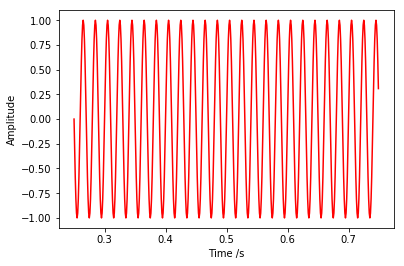

In [35]:
plt.plot(t_new, Sp_conv, 'r')
plt.xlabel('Time /s')
plt.ylabel('Amplitude')
# This confirms that the Convolve function is working as the same plot is produced
# The phase is wrong

**To see the frequencies of the filtered signal apply FT**

The Nyquist Frequency is 500.0 Hz


Text(0,0.5,u'Magnitude')

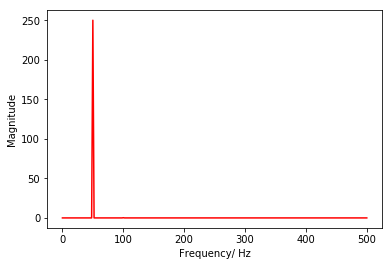

In [36]:
FT(Fy_conv, dt)
plt.xlabel('Frequency/ Hz')
plt.ylabel('Magnitude')

The 100 Hz signal has been removed as required